In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from PIL import Image
from tensorflow.keras.optimizers import RMSprop
import  numpy as np
from keras.preprocessing import image
import numpy as np


In [2]:
dir_property = './database/Brain tumor sample/Train/Glioma/gg (1).jpg'
image_propreties = Image.open(dir_property)

width, heigh = image_propreties.size

print(width, heigh)

512 512


In [3]:
TRAINING_DIR = './database/Brain tumor sample/Train'
VALIDATION_DIR = './database/Brain tumor sample/Val'

training_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
training_generator = training_datagen.flow_from_directory(TRAINING_DIR,target_size=(width, heigh),batch_size=30,class_mode='categorical')
validation_generator = validation_datagen.flow_from_directory(TRAINING_DIR,target_size=(width, heigh),batch_size=30,class_mode='categorical')

Found 4737 images belonging to 4 classes.
Found 4737 images belonging to 4 classes.


In [5]:
model = keras.Sequential([
    keras.layers.Input(shape=(width,heigh,3)),
    keras.layers.Conv2D(16,(3,3),activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(32,(3,3),activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dense(4,activation='softmax'),
])

In [6]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(learning_rate=0.001),metrics=['accuracy'])

In [7]:
history = model.fit(training_generator,steps_per_epoch=8,epochs=100,validation_data=validation_generator,verbose=2,validation_steps=8)

c:\Users\mbern\OneDrive\Área de Trabalho\Brain Tumors\Brain-Tumor\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
8/8 - 27s - 3s/step - accuracy: 0.2917 - loss: 1.7127 - val_accuracy: 0.4292 - val_loss: 1.3651
Epoch 2/100
8/8 - 19s - 2s/step - accuracy: 0.4388 - loss: 1.2981 - val_accuracy: 0.4542 - val_loss: 1.2407
Epoch 3/100
8/8 - 19s - 2s/step - accuracy: 0.3958 - loss: 1.2530 - val_accuracy: 0.5958 - val_loss: 1.0580
Epoch 4/100
8/8 - 19s - 2s/step - accuracy: 0.5250 - loss: 1.1202 - val_accuracy: 0.6125 - val_loss: 0.9729
Epoch 5/100
8/8 - 22s - 3s/step - accuracy: 0.5625 - loss: 0.9973 - val_accuracy: 0.5833 - val_loss: 0.8845
Epoch 6/100
8/8 - 21s - 3s/step - accuracy: 0.5958 - loss: 0.9790 - val_accuracy: 0.5958 - val_loss: 0.9983
Epoch 7/100
8/8 - 21s - 3s/step - accuracy: 0.6167 - loss: 0.9010 - val_accuracy: 0.6375 - val_loss: 0.8818
Epoch 8/100
8/8 - 20s - 2s/step - accuracy: 0.6375 - loss: 0.8812 - val_accuracy: 0.6542 - val_loss: 0.8105
Epoch 9/100
8/8 - 20s - 2s/step - accuracy: 0.6375 - loss: 0.8943 - val_accuracy: 0.6542 - val_loss: 0.8205
Epoch 10/100
8/8 - 20s - 2s/

c:\Users\mbern\OneDrive\Área de Trabalho\Brain Tumors\Brain-Tumor\.venv\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


8/8 - 15s - 2s/step - accuracy: 0.7722 - loss: 0.5617 - val_accuracy: 0.7917 - val_loss: 0.5724
Epoch 21/100
8/8 - 20s - 2s/step - accuracy: 0.7208 - loss: 0.6475 - val_accuracy: 0.7875 - val_loss: 0.5013
Epoch 22/100
8/8 - 23s - 3s/step - accuracy: 0.7708 - loss: 0.5856 - val_accuracy: 0.8125 - val_loss: 0.4614
Epoch 23/100
8/8 - 20s - 2s/step - accuracy: 0.7417 - loss: 0.6150 - val_accuracy: 0.8250 - val_loss: 0.4376
Epoch 24/100
8/8 - 20s - 2s/step - accuracy: 0.8000 - loss: 0.5717 - val_accuracy: 0.8125 - val_loss: 0.4733
Epoch 25/100
8/8 - 20s - 2s/step - accuracy: 0.8333 - loss: 0.4326 - val_accuracy: 0.8500 - val_loss: 0.3693
Epoch 26/100
8/8 - 19s - 2s/step - accuracy: 0.8375 - loss: 0.4008 - val_accuracy: 0.8833 - val_loss: 0.3156
Epoch 27/100
8/8 - 20s - 2s/step - accuracy: 0.8167 - loss: 0.5445 - val_accuracy: 0.7667 - val_loss: 0.5171
Epoch 28/100
8/8 - 20s - 2s/step - accuracy: 0.8125 - loss: 0.4606 - val_accuracy: 0.8583 - val_loss: 0.3656
Epoch 29/100
8/8 - 19s - 2s/step

In [8]:
accuracy = history.history['accuracy']
loss = history.history['loss']
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

In [9]:
import matplotlib.pyplot as plt

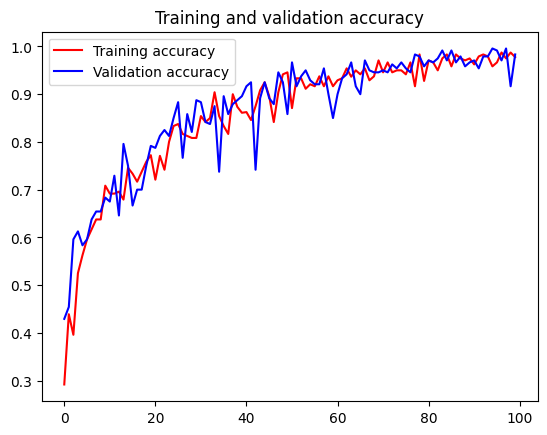

In [10]:
plt.plot(epochs,accuracy,'r',label='Training accuracy')
plt.plot(epochs,val_accuracy,'b',label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

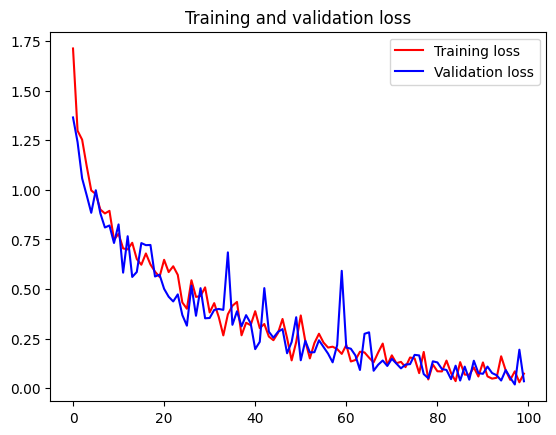

In [11]:
plt.plot(epochs,loss,'r',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [12]:
img_minngioma = image.load_img('C0393908-Large_Frontal_Meningioma,_MRI.jpg',target_size=(width,heigh))
img_minngioma_array = image.img_to_array(img_minngioma)
img_minngioma_array = np.expand_dims(img_minngioma_array,axis=0)
img_minngioma_array = np.vstack([img_minngioma_array])
class_result = model.predict(img_minngioma_array, batch_size=10)
if class_result[0][0] == 1:
    print("It's a Glioma")
elif class_result[0][1] == 1 :
    print("It's a Meningioma")
elif class_result[0][2] == 1 :
    print("It's a No tumor")
else:
    print("It's a Pituitary")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step
It's a Meningioma


In [13]:
img_no_tumor = image.load_img('3-abnormal-mri-of-brain-medical-body-scans.jpg',target_size=(width,heigh))
img_no_tumor_array = image.img_to_array(img_no_tumor)
img_no_tumor_array = np.expand_dims(img_no_tumor_array,axis=0)
img_no_tumor_array = np.vstack([img_no_tumor_array])
class_result = model.predict(img_no_tumor_array, batch_size=10)
if class_result[0][0] == 1:
    print("It's a Glioma")
elif class_result[0][1] == 1 :
    print("It's a Meningioma")
elif class_result[0][2] == 1 :
    print("It's a No tumor")
else:
    print("It's a Pituitary")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
It's a No tumor


In [14]:
img_glioma = image.load_img('Tr-gl_0485.jpg',target_size=(width,heigh))
img_glioma_array = image.img_to_array(img_glioma)
img_glioma_array = np.expand_dims(img_glioma_array,axis=0)
img_glioma_array = np.vstack([img_glioma_array])
class_result = model.predict(img_glioma_array, batch_size=10)
if class_result[0][0] == 1:
    print("It's a Glioma")
elif class_result[0][1] == 1 :
    print("It's a Meningioma")
elif class_result[0][2] == 1 :
    print("It's a No tumor")
else:
    print("It's a Pituitary")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
It's a Glioma


In [ ]:
img_pituitary = image.load_img('mllecqme.png',target_size=(width,heigh))
img_pituitary_array = image.img_to_array(img_pituitary)
img_pituitary_array = np.expand_dims(img_pituitary_array,axis=0)
img_pituitary_array = np.vstack([img_pituitary_array])
class_result = model.predict(img_pituitary_array, batch_size=10)
if class_result[0][0] == 1:
    print("It's a Glioma")
elif class_result[0][1] == 1 :
    print("It's a Meningioma")
elif class_result[0][2] == 1 :
    print("It's a No tumor")
else:
    print("It's a Pituitary")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
It's a Pituitary


In [17]:
img_minngioma_2 = image.load_img('67dcac388ad1cc69f7252e9ab44516_big_gallery.jpeg',target_size=(width,heigh))
img_minngioma_array_2 = image.img_to_array(img_minngioma_2)
img_minngioma_array_2 = np.expand_dims(img_minngioma_array_2,axis=0)
img_minngioma_array_2 = np.vstack([img_minngioma_array_2])
class_result = model.predict(img_minngioma_array_2, batch_size=10)
if class_result[0][0] == 1:
    print("It's a Glioma")
elif class_result[0][1] == 1 :
    print("It's a Meningioma")
elif class_result[0][2] == 1 :
    print("It's a No tumor")
else:
    print("It's a Pituitary")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
It's a Meningioma
